In [1]:
import warnings
warnings.filterwarnings('ignore')

import torch
import linear_rep_geometry as lrg

device = torch.device("cuda:0")

g = torch.load('matrices/g.pt').to(device)
concept_g = torch.load('matrices/concept_g.pt').to(device)
sqrt_Cov_gamma = torch.load("matrices/sqrt_Cov_gamma.pt").to(device)
W, d = g.shape

concept_names = []
with open('matrices/concept_names.txt', 'r') as f:
    for line in f.readlines():
        concept_names.append(line.strip())

The `load_in_4bit` and `load_in_8bit` arguments are deprecated and will be removed in the future versions. Please, pass a `BitsAndBytesConfig` object in `quantization_config` argument instead.


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

In [2]:
text_batch = ["Long live the",
              "The lion is the",
              "In the hierarchy of medieval society, the highest rank was the",
              "Arthur was a legendary",
              "He was known as the warrior",
              "In a monarchy, the ruler is usually a",
              "He sat on the throne, the",
              "A sovereign ruler in a monarchy is often a",
              "His domain was vast, for he was a",
              "The lion, in many cultures, is considered the",
              "He wore a crown, signifying he was the",
              "A male sovereign who reigns over a kingdom is a",
              "Every kingdom has its ruler, typically a",
              "The prince matured and eventually became the",
              "In the deck of cards, alongside the queen is the",
              "Der männliche Herrscher einer Monarchie ist ein",
              "Der Mann, der auf dem Thron sitzt, ist der",
              "Er trägt eine Krone, deshalb ist er der",
              "Der Mann trägt eine Krone, denn er ist der"
              ]
lambda_batch = lrg.get_embeddings(text_batch)
l_batch = lambda_batch @ sqrt_Cov_gamma

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
We detected that you are passing `past_key_values` as a tuple and this is deprecated and will be removed in v4.43. Please use an appropriate `Cache` class (https://huggingface.co/docs/transformers/v4.41.3/en/internal/generation_utils#transformers.Cache)


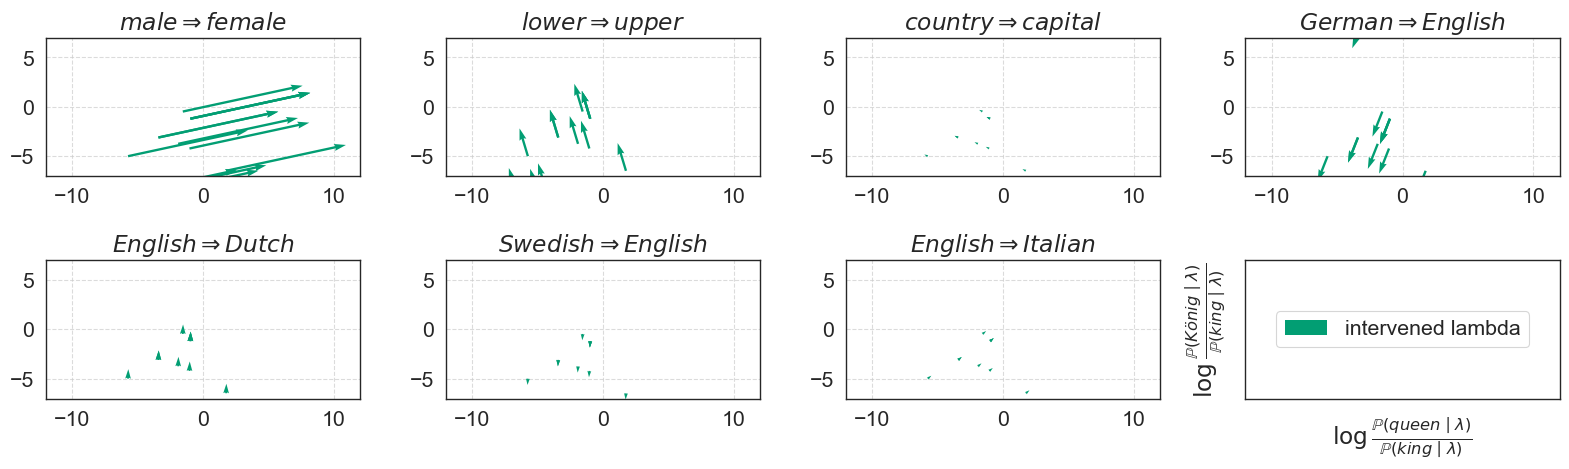

In [5]:
selected_concepts = [0, 1, 2, 3, 4, 5, 6]

lrg.show_intervention_new(l_batch, g, concept_g, concept_names,
                          selected_concepts ,base = "king", W = "queen", Z = "König",
                        alpha = 0.4, xlim =[-12, 12], ylim =[-7, 7], fig_name = "g")

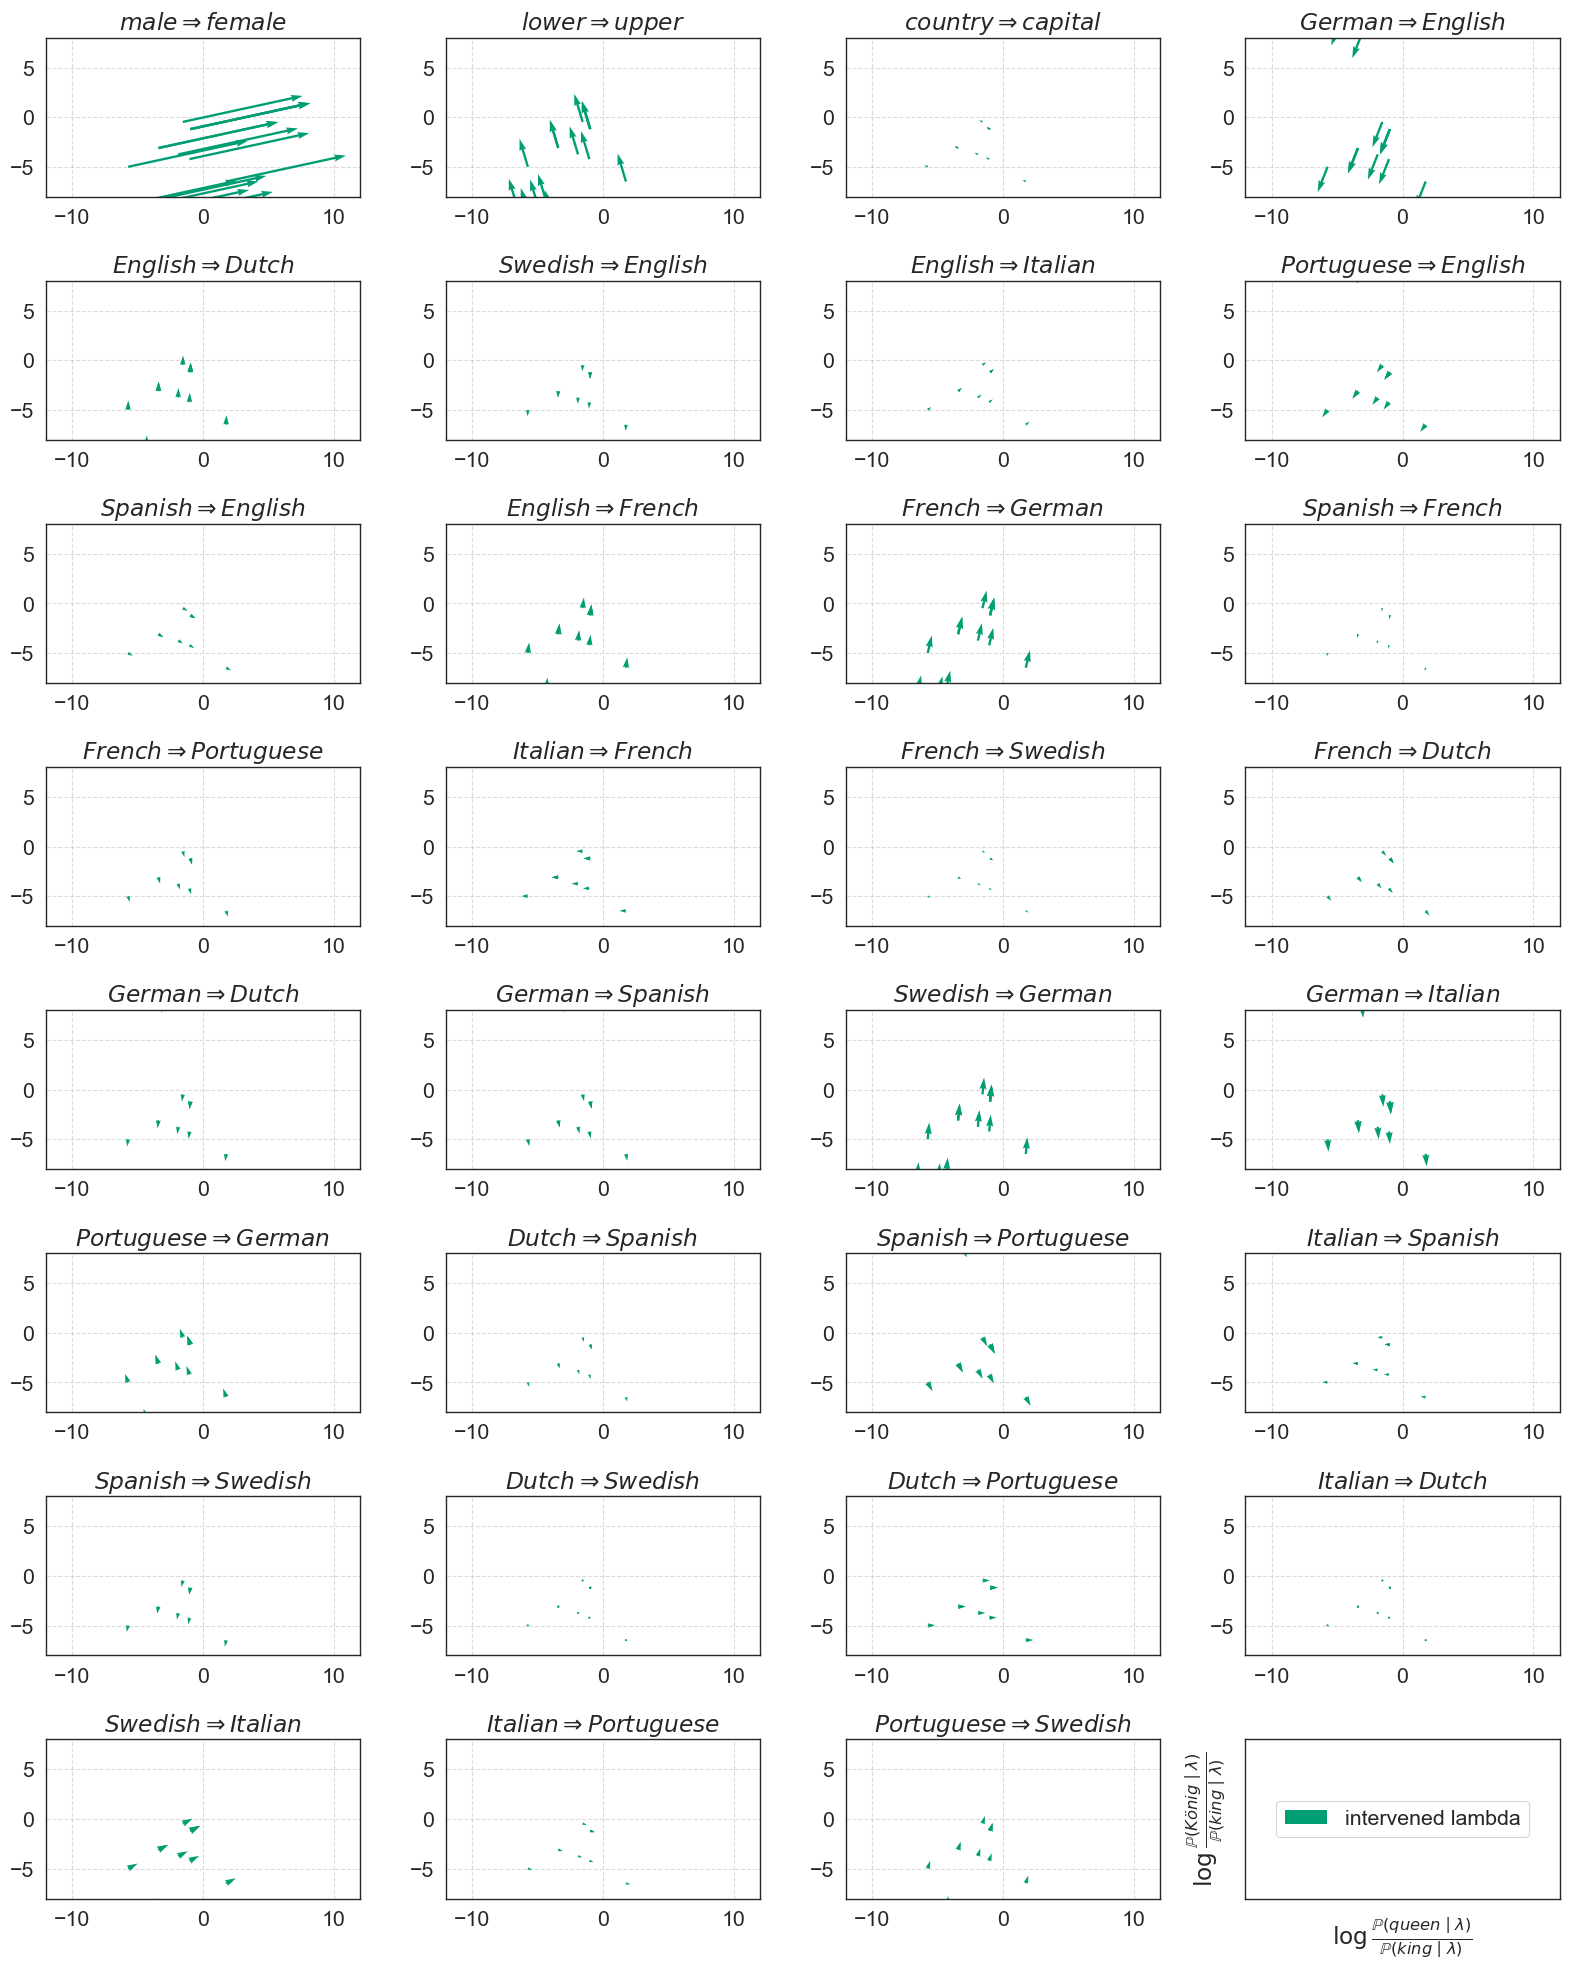

In [4]:
lrg.show_intervention(l_batch, g, concept_g, concept_names,
                        base = "king", W = "queen", Z = "König",
                        alpha = 0.4, xlim =[-12, 12], ylim =[-8, 8], fig_name = "g")

In [45]:
lrg.show_rank(text_batch, l_batch, g, concept_g, which_ind = 16, concept_number = 1)

Prompt: Der Mann, der auf dem Thron sitzt, ist der
  |  0.2 | 0.4 | 0.6 | 0.8 | 1.0
1 | König | Herr | Herr | Herr | King
2 | Herr | König | König | King | Herr
3 | Sohn | Sohn | King | König | König
4 | Mann | K | Sohn | Sohn | Red
5 | K | Mann | K | Red | Dog


In [50]:
lrg.show_rank(text_batch, l_batch, g, concept_g, which_ind = 17, concept_number = 1)

Prompt: Er trägt eine Krone, deshalb ist er der
  |  0.2 | 0.4 | 0.6 | 0.8 | 1.0
1 | auch | König | König | King | King
2 | König | auch | auch | König | König
3 | der | der | der | auch | auch
4 | ein | ein | ein | der | der
5 | so | King | King | ein | ein
